### Notch Filtering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from mne_features.univariate import compute_pow_freq_bands
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from utils import *

In [2]:
from sklearn.metrics import precision_score, recall_score

In [3]:
mne.set_log_level('WARNING')

In [4]:
df = pd.read_csv('by_patient.csv')

In [5]:
other_df = activity_df(df, 'Other', 'expert_consensus')
seizure_df = activity_df(df, 'Seizure', 'expert_consensus')
lpd_df = activity_df(df, 'LPD', 'expert_consensus')
gpd_df = activity_df(df, 'GPD', 'expert_consensus')
lrda_df = activity_df(df, 'LRDA', 'expert_consensus')
grda_df = activity_df(df, 'GRDA', 'expert_consensus')

In [6]:
activity_df_list = [other_df, seizure_df, gpd_df, lpd_df, grda_df, lrda_df]

### Visualizing Notch Filters with Power Spectrum  
  
There are a few different approaches to notch filtering I want to visualize here and then I want to use those before feature extraction and get results.  
  
The first adjustment to be made is changing the phase of the notch filter. The default is zero phase and the alternative is minimum phase.  
  
The second adjustment is changing the filter method. There are three different methods to try. The default is FIR filtering. There is also IIR filtering and the spectrum fit method.  
  
The spectrum fit method is an approach that attempts to filter out only the artifactual data while keeping the other data intact. It will auto-identify abnormalities in the power spectrum to filter if it isn't told which frequencies to handle.

In [7]:
raw1 = load_preprocess(df, 2500, 1, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, 2500, 1, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, 2500, 1, 90, bandpass = False, notch = False, reref = False)
raw4 = load_preprocess(df, 2500, 1, 90, bandpass = False, notch = False, reref = False)
raw5 = load_preprocess(df, 2500, 1, 90, bandpass = False, notch = False, reref = False)

In [8]:
raw2.notch_filter(60, picks = 'eeg')
raw3.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw4.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw5.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,EKG
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


I'm avoiding comparing the IIR method with the FIR method for now because to fully compare those, the boundaries of the filters need to be adjusted. Here I'm comparing the default FIR notch filter with minimum phase notch filtering and spectrum fit notch filtering.

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


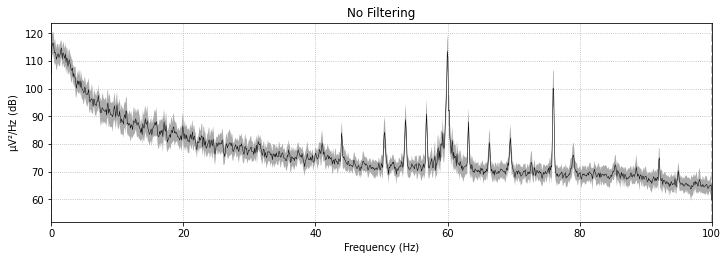

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


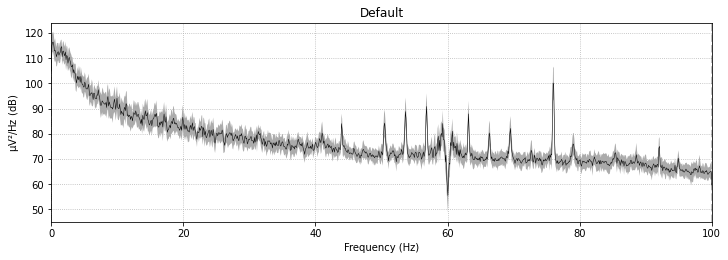

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


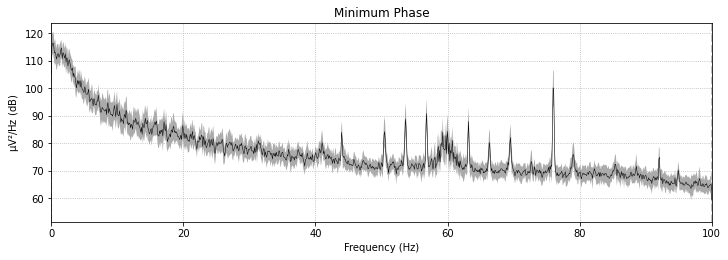

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


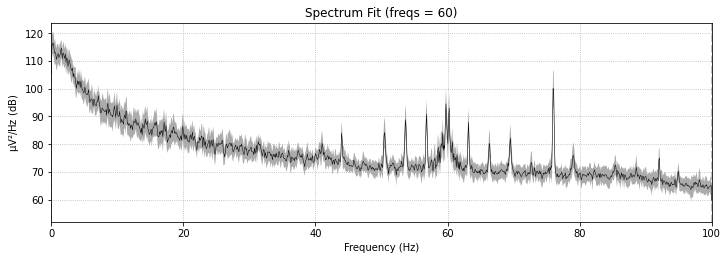

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


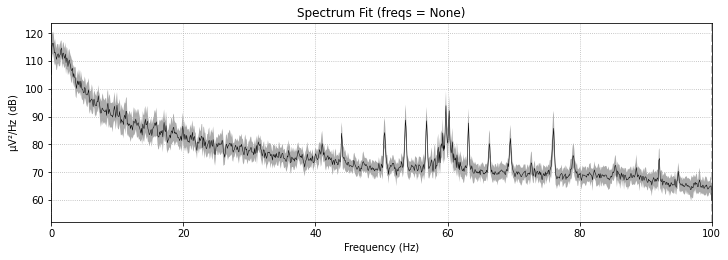

In [15]:
raw_list = [raw1, raw2, raw3, raw4, raw5]
methods = ['No Filtering', 'Default', 'Minimum Phase', 'Spectrum Fit (freqs = 60)', 'Spectrum Fit (freqs = None)']
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title(methods[i])
    plt.show()

In [16]:
raw1 = load_preprocess(df, 5000, 1, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, 5000, 1, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, 5000, 1, 90, bandpass = False, notch = False, reref = False)
raw4 = load_preprocess(df, 5000, 1, 90, bandpass = False, notch = False, reref = False)
raw5 = load_preprocess(df, 5000, 1, 90, bandpass = False, notch = False, reref = False)

raw2.notch_filter(60, picks = 'eeg')
raw3.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw4.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw5.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,EKG
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


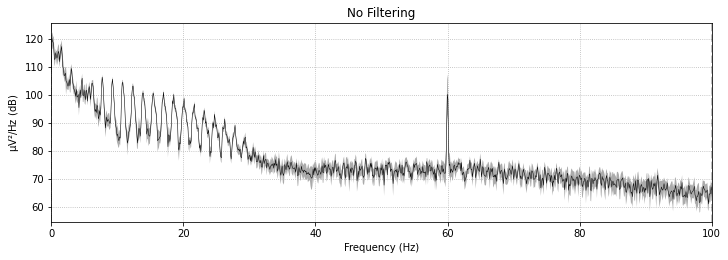

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


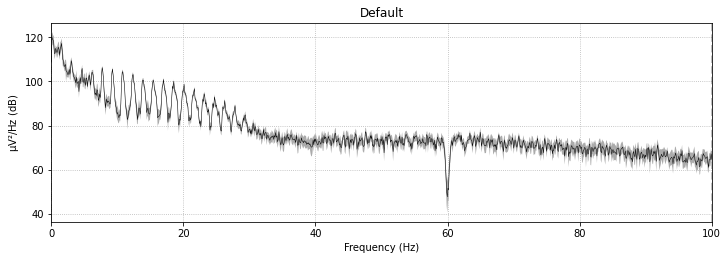

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


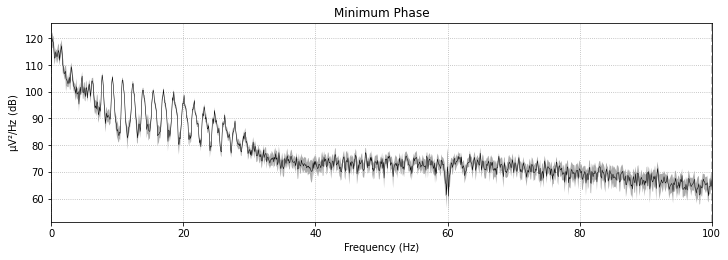

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


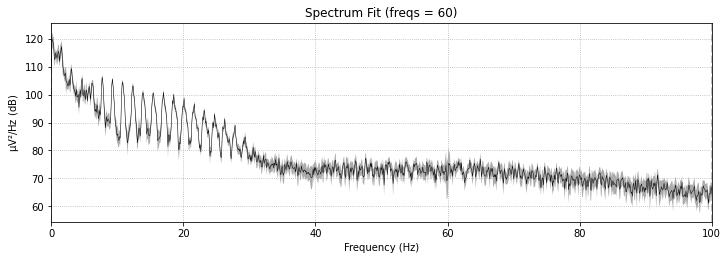

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


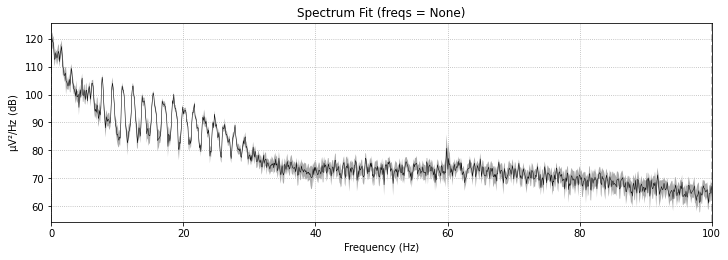

In [17]:
raw_list = [raw1, raw2, raw3, raw4, raw5]
methods = ['No Filtering', 'Default', 'Minimum Phase', 'Spectrum Fit (freqs = 60)', 'Spectrum Fit (freqs = None)']
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title(methods[i])
    plt.show()

In [39]:
i_vals = [i for i in range(df.shape[0])]
random_index = np.random.choice(i_vals, size = 1, replace = False)[0]

In [40]:
raw1 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw4 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw5 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)

raw2.notch_filter(60, picks = 'eeg')
raw3.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw4.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw5.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,EKG
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


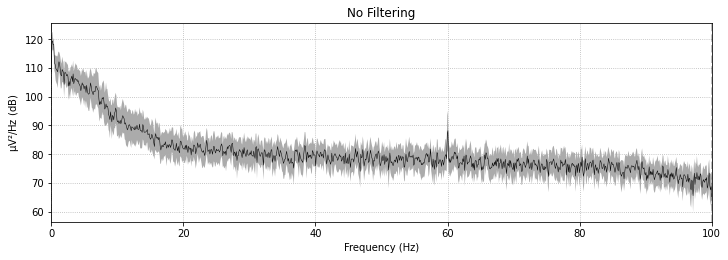

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


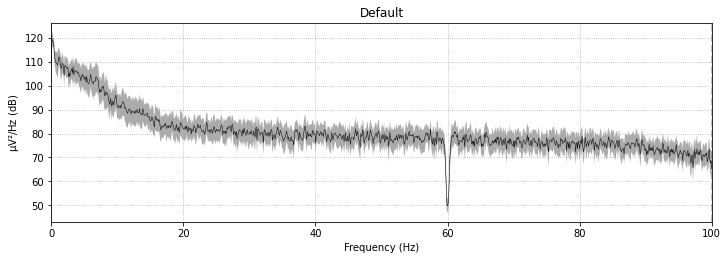

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


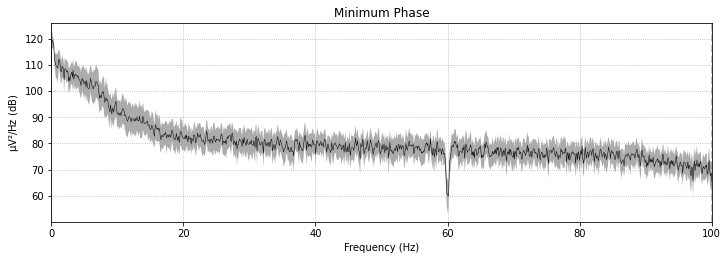

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


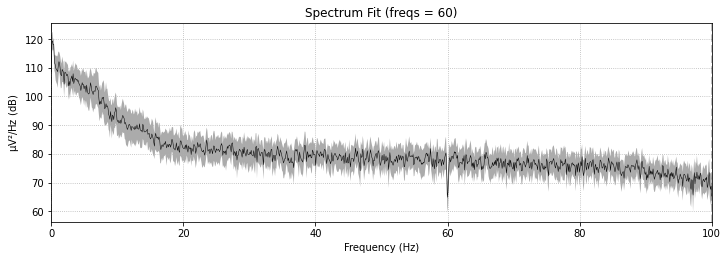

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


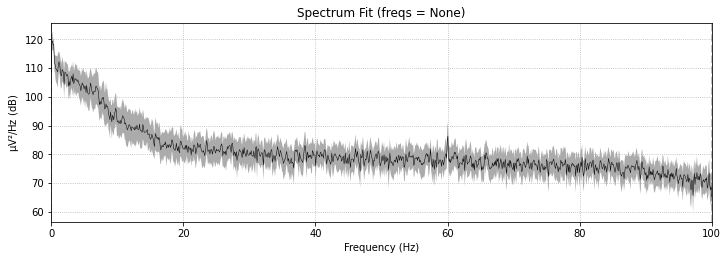

In [41]:
raw_list = [raw1, raw2, raw3, raw4, raw5]
methods = ['No Filtering', 'Default', 'Minimum Phase', 'Spectrum Fit (freqs = 60)', 'Spectrum Fit (freqs = None)']
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title(methods[i])
    plt.show()

### FIR vs. IIR

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


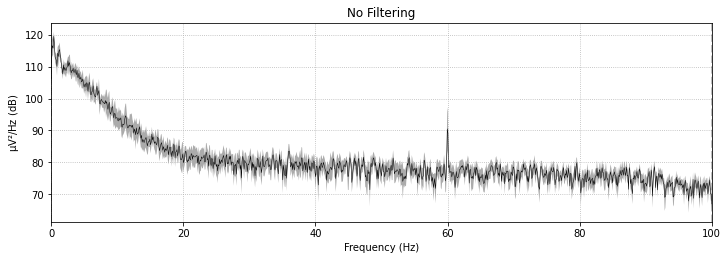

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


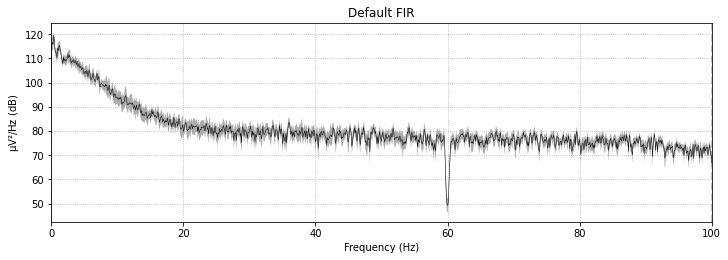

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


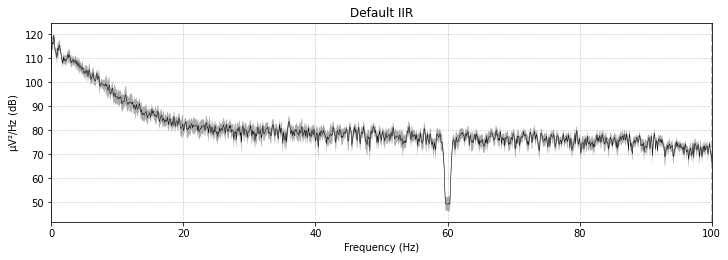

In [44]:
random_index = np.random.choice(i_vals, size = 1, replace = False)[0]

raw1 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, random_index, 1, 90, bandpass = False, notch = False, reref = False)

raw2.notch_filter(60, picks = 'eeg')
raw3.notch_filter(60, method = 'iir', picks = 'eeg')

raw_list = [raw1, raw2, raw3]
methods = ['No Filtering', 'Default FIR', 'Default IIR']
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title(methods[i])
    plt.show()

### Getting Results with Default FIR Notch Filter

In [9]:
#default_notch_features = full_band_df(2000, activity_df_list, 1, 90, bandpass = True, notch = True, reref = False)
#default_notch_features.to_csv('default_notch.csv', index = None)

In [10]:
X = pd.read_csv('default_notch.csv')
y = get_yvals(2000)['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Default FIR Notch)')
print(classification_report(y_train, training_yhat))
print('Testing (Default FIR Notch)')
print(classification_report(y_test, testing_yhat))

Training (Default FIR Notch)
              precision    recall  f1-score   support

         GPD       0.77      0.92      0.84      1794
        GRDA       0.73      0.89      0.80      1819
         LPD       0.74      0.86      0.80      1800
        LRDA       0.82      0.88      0.85      1795
       Other       0.77      0.53      0.63      1808
     Seizure       0.88      0.59      0.71      1784

    accuracy                           0.78     10800
   macro avg       0.79      0.78      0.77     10800
weighted avg       0.79      0.78      0.77     10800

Testing (Default FIR Notch)
              precision    recall  f1-score   support

         GPD       0.67      0.84      0.74       206
        GRDA       0.54      0.74      0.63       181
         LPD       0.60      0.78      0.68       200
        LRDA       0.72      0.76      0.74       205
       Other       0.50      0.29      0.37       192
     Seizure       0.78      0.39      0.52       216

    accuracy        

In [12]:
default_fir_acc = accuracy_score(y_test, testing_yhat)
default_fir_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
default_fir_f1s = f1_score(y_test, testing_yhat, average = None)

In [13]:
f1_by_activity = pd.DataFrame(default_fir_f1s, index = np.unique(y), columns = ['Default FIR'])

In [14]:
f1_by_activity

,Default FIR
GPD,0.742489
GRDA,0.627635
LPD,0.681223
LRDA,0.737589
Other,0.365449
Seizure,0.523077


In [15]:
default_fir_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
default_fir_prec = precision_score(y_test, testing_yhat, average = None)
default_fir_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
default_fir_rec = recall_score(y_test, testing_yhat, average = None)

In [16]:
precisions = pd.DataFrame(default_fir_prec, index = np.unique(y), columns = ['Default FIR'])
recalls = pd.DataFrame(default_fir_rec, index = np.unique(y), columns = ['Default FIR'])

# Start Here  
  
Forgot to update the function in utils so that it would run the correct notch filter. Everything below this needs to be re-done.

### Getting Results with Minimum Phase Notch Filter

In [17]:
#minimum_notch_features = full_band_df(2000, activity_df_list, 1, 90, bandpass = True, notch = True, reref = False)
#minimum_notch_features.to_csv('minimum_notch.csv', index = None)

In [18]:
X = pd.read_csv('minimum_notch.csv')
y = get_yvals(2000)['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

The minimum phase notch filter has a testing accuracy 3% higher than the zero phase notch filter. This testing accuracy however is equivalent to the testing accuracy without any notch filtering done at all. In the interest of both erring on the side of caution and avoiding unnecessary computational burden, it's best to not use this method unless there's some way to adjust the parameters and significantly improve results with it.

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Minimum Phase Notch)')
print(classification_report(y_train, training_yhat))
print('Testing (Minimum Phase Notch)')
print(classification_report(y_test, testing_yhat))

Training (Minimum Phase Notch)
              precision    recall  f1-score   support

         GPD       0.79      0.92      0.85      1794
        GRDA       0.72      0.86      0.79      1819
         LPD       0.74      0.86      0.79      1800
        LRDA       0.81      0.86      0.83      1795
       Other       0.75      0.55      0.63      1808
     Seizure       0.87      0.60      0.71      1784

    accuracy                           0.77     10800
   macro avg       0.78      0.77      0.77     10800
weighted avg       0.78      0.77      0.77     10800

Testing (Minimum Phase Notch)
              precision    recall  f1-score   support

         GPD       0.69      0.85      0.76       206
        GRDA       0.57      0.76      0.65       181
         LPD       0.63      0.78      0.70       200
        LRDA       0.76      0.76      0.76       205
       Other       0.53      0.31      0.39       192
     Seizure       0.79      0.49      0.60       216

    accuracy    

In [20]:
minimum_phase_acc = accuracy_score(y_test, testing_yhat)
minimum_phase_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
minimum_phase_f1s = f1_score(y_test, testing_yhat, average = None)

In [21]:
f1_by_activity['Minimum Phase'] = minimum_phase_f1s

In [22]:
minimum_phase_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
minimum_phase_prec = precision_score(y_test, testing_yhat, average = None)
minimum_phase_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
minimum_phase_rec = recall_score(y_test, testing_yhat, average = None)

In [23]:
precisions['Minimum Phase'] = minimum_phase_prec
recalls['Minimum Phase'] = minimum_phase_rec

In [24]:
precisions

,Default FIR,Minimum Phase
GPD,0.665385,0.687500
GRDA,0.544715,0.565574
LPD,0.604651,0.629032
LRDA,0.715596,0.763547
Other,0.504587,0.526316
Seizure,0.779817,0.785185


In [25]:
recalls

,Default FIR,Minimum Phase
GPD,0.839806,0.854369
GRDA,0.740331,0.762431
LPD,0.780000,0.780000
LRDA,0.760976,0.756098
Other,0.286458,0.312500
Seizure,0.393519,0.490741


The main thing to note about these results is that the minimum phase notch filter does considerably better with seizure data than the zero phase notch filter. This 8% increase in F1 score for the seizure data is driven by a 10% increase in recall for the seizure data.

In [26]:
f1_by_activity

,Default FIR,Minimum Phase
GPD,0.742489,0.761905
GRDA,0.627635,0.649412
LPD,0.681223,0.696429
LRDA,0.737589,0.759804
Other,0.365449,0.392157
Seizure,0.523077,0.603989


### Getting Results with Spectrum Fit (freqs = 60)

In [27]:
#spec60_notch_features = full_band_df(2000, activity_df_list, 1, 90, bandpass = True, notch = True, reref = False)
#spec60_notch_features.to_csv('spec60_notch.csv', index = None)

In [28]:
X = pd.read_csv('spec60_notch.csv')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Spectrum Fit Notch (60 Hz))')
print(classification_report(y_train, training_yhat))
print('Testing (Spectrum Fit Notch (60 Hz))')
print(classification_report(y_test, testing_yhat))

Training (Spectrum Fit Notch (60 Hz))
              precision    recall  f1-score   support

         GPD       0.79      0.94      0.86      1794
        GRDA       0.72      0.88      0.79      1819
         LPD       0.74      0.85      0.79      1800
        LRDA       0.83      0.88      0.85      1795
       Other       0.76      0.55      0.64      1808
     Seizure       0.88      0.59      0.71      1784

    accuracy                           0.78     10800
   macro avg       0.79      0.78      0.77     10800
weighted avg       0.79      0.78      0.77     10800

Testing (Spectrum Fit Notch (60 Hz))
              precision    recall  f1-score   support

         GPD       0.69      0.88      0.77       206
        GRDA       0.57      0.76      0.65       181
         LPD       0.58      0.71      0.64       200
        LRDA       0.72      0.78      0.74       205
       Other       0.51      0.30      0.37       192
     Seizure       0.81      0.44      0.57       216

  

In [30]:
spec60_acc = accuracy_score(y_test, testing_yhat)
spec60_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
spec60_f1s = f1_score(y_test, testing_yhat, average = None)

In [31]:
f1_by_activity['Spectrum Fit (60 Hz)'] = spec60_f1s

In [32]:
spec60_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
spec60_prec = precision_score(y_test, testing_yhat, average = None)
spec60_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
spec60_rec = recall_score(y_test, testing_yhat, average = None)

In [33]:
precisions['Spectrum Fit (60 Hz)'] = spec60_prec
recalls['Spectrum Fit (60 Hz)'] = spec60_rec

### Getting Results with Spectrum Fit (freqs = None)

In [34]:
#spec_notch_features = full_band_df(2000, activity_df_list, 1, 90, bandpass = True, notch = True, reref = False)
#spec_notch_features.to_csv('spec_notch.csv', index = None)

In [35]:
X = pd.read_csv('spec_notch.csv')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Spectrum Fit Notch (Freqs = None))')
print(classification_report(y_train, training_yhat))
print('Testing (Spectrum Fit Notch (Freqs = None))')
print(classification_report(y_test, testing_yhat))

Training (Spectrum Fit Notch (Freqs = None))
              precision    recall  f1-score   support

         GPD       0.78      0.92      0.85      1794
        GRDA       0.73      0.87      0.80      1819
         LPD       0.75      0.85      0.80      1800
        LRDA       0.81      0.88      0.84      1795
       Other       0.74      0.54      0.62      1808
     Seizure       0.87      0.57      0.69      1784

    accuracy                           0.77     10800
   macro avg       0.78      0.77      0.77     10800
weighted avg       0.78      0.77      0.77     10800

Testing (Spectrum Fit Notch (Freqs = None))
              precision    recall  f1-score   support

         GPD       0.71      0.86      0.77       206
        GRDA       0.57      0.82      0.67       181
         LPD       0.63      0.72      0.67       200
        LRDA       0.73      0.81      0.77       205
       Other       0.54      0.32      0.40       192
     Seizure       0.80      0.43      0.56

In [37]:
spec_acc = accuracy_score(y_test, testing_yhat)
spec_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
spec_f1s = f1_score(y_test, testing_yhat, average = None)

In [38]:
f1_by_activity['Spectrum Fit (None)'] = spec_f1s

In [39]:
spec_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
spec_prec = precision_score(y_test, testing_yhat, average = None)
spec_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
spec_rec = recall_score(y_test, testing_yhat, average = None)

In [40]:
precisions['Spectrum Fit (None)'] = spec_prec
recalls['Spectrum Fit (None)'] = spec_rec

### Getting Results with Default IIR Filter

In [41]:
#iir_notch_features = full_band_df(2000, activity_df_list, 1, 90, bandpass = True, notch = True, reref = False)
#iir_notch_features.to_csv('iir_notch.csv', index = None)

In [42]:
X = pd.read_csv('iir_notch.csv')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Default IIR Notch)')
print(classification_report(y_train, training_yhat))
print('Testing (Default IIR Notch)')
print(classification_report(y_test, testing_yhat))

Training (Default IIR Notch)
              precision    recall  f1-score   support

         GPD       0.79      0.92      0.85      1794
        GRDA       0.73      0.87      0.79      1819
         LPD       0.74      0.86      0.80      1800
        LRDA       0.80      0.88      0.83      1795
       Other       0.75      0.54      0.63      1808
     Seizure       0.87      0.59      0.70      1784

    accuracy                           0.78     10800
   macro avg       0.78      0.78      0.77     10800
weighted avg       0.78      0.78      0.77     10800

Testing (Default IIR Notch)
              precision    recall  f1-score   support

         GPD       0.70      0.90      0.79       206
        GRDA       0.57      0.81      0.67       181
         LPD       0.58      0.70      0.64       200
        LRDA       0.73      0.75      0.74       205
       Other       0.56      0.34      0.42       192
     Seizure       0.76      0.38      0.51       216

    accuracy        

In [44]:
default_iir_acc = accuracy_score(y_test, testing_yhat)
default_iir_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
default_iir_f1s = f1_score(y_test, testing_yhat, average = None)

In [45]:
f1_by_activity['Default IIR'] = default_iir_f1s

In [46]:
default_iir_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
default_iir_prec = precision_score(y_test, testing_yhat, average = None)
default_iir_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
default_iir_rec = recall_score(y_test, testing_yhat, average = None)

In [47]:
precisions['Default IIR'] = default_iir_prec
recalls['Default IIR'] = default_iir_rec

### Getting Results without Notch Filtering to Include in Tables  
  
Especially want F1 score by activity to compare differences by activity type. Similar overall results aren't necessarily similar results.

In [48]:
X = pd.read_csv('bandpass_190.csv')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (No Notch)')
print(classification_report(y_train, training_yhat))
print('Testing (No Notch)')
print(classification_report(y_test, testing_yhat))

Training (No Notch)
              precision    recall  f1-score   support

         GPD       0.80      0.93      0.86      1794
        GRDA       0.73      0.88      0.79      1819
         LPD       0.75      0.86      0.80      1800
        LRDA       0.82      0.87      0.84      1795
       Other       0.77      0.56      0.65      1808
     Seizure       0.87      0.60      0.71      1784

    accuracy                           0.78     10800
   macro avg       0.79      0.78      0.78     10800
weighted avg       0.79      0.78      0.78     10800

Testing (No Notch)
              precision    recall  f1-score   support

         GPD       0.73      0.86      0.79       206
        GRDA       0.57      0.80      0.67       181
         LPD       0.61      0.76      0.68       200
        LRDA       0.74      0.77      0.76       205
       Other       0.49      0.28      0.36       192
     Seizure       0.83      0.50      0.62       216

    accuracy                          

In [50]:
no_notch_acc = accuracy_score(y_test, testing_yhat)
no_notch_macro_f1 = f1_score(y_test, testing_yhat, average = 'macro')
no_notch_f1s = f1_score(y_test, testing_yhat, average = None)

In [51]:
f1_by_activity['No Notch'] = no_notch_f1s

In [52]:
no_notch_macro_prec = precision_score(y_test, testing_yhat, average = 'macro')
no_notch_prec = precision_score(y_test, testing_yhat, average = None)
no_notch_macro_rec = recall_score(y_test, testing_yhat, average = 'macro')
no_notch_rec = recall_score(y_test, testing_yhat, average = None)

In [53]:
precisions['No Notch'] = no_notch_prec
recalls['No Notch'] = no_notch_rec

In [54]:
precisions.round(decimals = 3)

,Default FIR,Minimum Phase,Spectrum Fit (60 Hz),Spectrum Fit (None),Default IIR,No Notch
GPD,0.665,0.688,0.691,0.705,0.705,0.725
GRDA,0.545,0.566,0.566,0.567,0.568,0.573
LPD,0.605,0.629,0.581,0.630,0.580,0.610
LRDA,0.716,0.764,0.716,0.728,0.729,0.742
Other,0.505,0.526,0.509,0.540,0.556,0.486
Seizure,0.780,0.785,0.810,0.800,0.761,0.831


In [55]:
recalls.round(decimals = 3)

,Default FIR,Minimum Phase,Spectrum Fit (60 Hz),Spectrum Fit (None),Default IIR,No Notch
GPD,0.840,0.854,0.879,0.859,0.903,0.859
GRDA,0.740,0.762,0.757,0.823,0.807,0.801
LPD,0.780,0.780,0.715,0.725,0.705,0.760
LRDA,0.761,0.756,0.776,0.810,0.746,0.771
Other,0.286,0.312,0.297,0.318,0.339,0.281
Seizure,0.394,0.491,0.435,0.426,0.384,0.500


The only category where not notch filtering performs the worst is with the other data. It's the best method for f1 score for seizure data. Not notch filtering ranks 2nd with GPD, 2nd with GRDA, 3rd with LPD, 3rd with LRDA, 6th (last) with Other, and 1st with Seizure. The 2nd place approach for seizure data is minimum phase notch filtering which has an F1 score 2% lower than not notch filtering at all.

In [56]:
f1_by_activity.round(decimals = 3)

,Default FIR,Minimum Phase,Spectrum Fit (60 Hz),Spectrum Fit (None),Default IIR,No Notch
GPD,0.742,0.762,0.774,0.775,0.791,0.787
GRDA,0.628,0.649,0.648,0.671,0.667,0.668
LPD,0.681,0.696,0.641,0.674,0.637,0.677
LRDA,0.738,0.760,0.745,0.767,0.737,0.756
Other,0.365,0.392,0.375,0.400,0.421,0.356
Seizure,0.523,0.604,0.566,0.556,0.511,0.624


### Testing Accuracies

In [66]:
test_accs = [default_fir_acc, minimum_phase_acc, spec60_acc, spec_acc, default_iir_acc, no_notch_acc]
methods = ['FIR', 'Minimum', 'Spec60', 'SpecNone', 'IIR', 'No Notch']

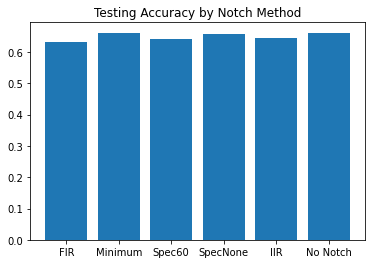

In [69]:
plt.bar(methods, test_accs)
plt.title('Testing Accuracy by Notch Method')
plt.show()

In [71]:
pd.DataFrame(test_accs, index = methods, columns = ['Testing Accuracy']).round(decimals = 3)

,Testing Accuracy
FIR,0.632
Minimum,0.659
Spec60,0.642
SpecNone,0.658
IIR,0.645
No Notch,0.662


### Notes on Next Steps  
  
It is possible that adjusting the filter boundaries will improve results with one of these methods to make using them worthwhile, but from the results above, not notch filtering and leaving the power line artifacts untouched is better than notch filtering to handle those artifacts.